Project realized in the context of Machine Learning forNatural Language Processing course at ENSAE.

Charles CANEILLES - MS Data Science

# **Prediction of Twitter's impact on Bitcoin's value**





In [1]:
import pandas as pd
import re
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns 

import nltk

from nltk.tokenize import TweetTokenizer
nltk.download('punkt')
sent_detector = nltk.data.load('tokenizers/punkt/english.pickle')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


## **1. Data importation**

In [2]:
#Importing datasets

! wget https://github.com/ccaneilles/NLP_Twitter_impact_on_BTC/raw/main/data/history.zip
! wget https://github.com/ccaneilles/NLP_Twitter_impact_on_BTC/raw/main/data/tweets.zip

--2022-04-24 16:54:16--  https://github.com/ccaneilles/NLP_Twitter_impact_on_BTC/raw/main/data/history.zip
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://media.githubusercontent.com/media/ccaneilles/NLP_Twitter_impact_on_BTC/main/data/history.zip [following]
--2022-04-24 16:54:16--  https://media.githubusercontent.com/media/ccaneilles/NLP_Twitter_impact_on_BTC/main/data/history.zip
Resolving media.githubusercontent.com (media.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to media.githubusercontent.com (media.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 77096 (75K) [application/zip]
Saving to: ‘history.zip’

history.zip         100%[===================>]  75.29K  --.-KB/s    in 0.002s  

2022-04-24 16:54:16 (39.9 MB/s) - ‘history.zip’ s

In [3]:
! unzip tweets.zip

Archive:  tweets.zip
  inflating: Bitcoin_tweets.csv      


In [4]:
! unzip history.zip

Archive:  history.zip
  inflating: BTC-USD.csv             


## **2. Data preprocessing**

### a. Bitcoin tweets

In [5]:
df_tweets = pd.read_csv('Bitcoin_tweets.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (4,5,6,7,12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [6]:
df_tweets.shape

(2830476, 13)

In [7]:
df_tweets.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,DeSota Wilson,"Atlanta, GA","Biz Consultant, real estate, fintech, startups...",2009-04-26 20:05:09,8534.0,7605,4838,False,2021-02-10 23:59:04,Blue Ridge Bank shares halted by NYSE after #b...,['bitcoin'],Twitter Web App,False
1,CryptoND,NaN,😎 BITCOINLIVE is a Dutch platform aimed at inf...,2019-10-17 20:12:10,6769.0,1532,25483,False,2021-02-10 23:58:48,"😎 Today, that's this #Thursday, we will do a ""...","['Thursday', 'Btc', 'wallet', 'security']",Twitter for Android,False
2,Tdlmatias,"London, England","IM Academy : The best #forex, #SelfEducation, ...",2014-11-10 10:50:37,128.0,332,924,False,2021-02-10 23:54:48,"Guys evening, I have read this article about B...",NaN,Twitter Web App,False
3,Crypto is the future,NaN,I will post a lot of buying signals for BTC tr...,2019-09-28 16:48:12,625.0,129,14,False,2021-02-10 23:54:33,$BTC A big chance in a billion! Price: \487264...,"['Bitcoin', 'FX', 'BTC', 'crypto']",dlvr.it,False
4,Alex Kirchmaier 🇦🇹🇸🇪 #FactsSuperspreader,Europa,Co-founder @RENJERJerky | Forbes 30Under30 | I...,2016-02-03 13:15:55,1249.0,1472,10482,False,2021-02-10 23:54:06,This network is secured by 9 508 nodes as of t...,['BTC'],Twitter Web App,False


In [8]:
# Cleaning and resampling (we are taking only 0,1% of the 2M tweets, 
# it will be enough for our analysis) our dataset

df_tweets = df_tweets.sort_values(by = 'date')
df_tweets_clean = df_tweets.sample(frac=0.01, replace=False, random_state=1)
df_tweets_clean.reset_index(inplace=True)
for i,s in enumerate(tqdm(df_tweets_clean['text'],position=0, leave=True)):
    text = str(df_tweets_clean.loc[i, 'text'])
    text = text.replace("#", "")
    text = re.sub('https?://(?:[-\w.]|(?:%[\da-fA-F]{2}))+', '', text, flags=re.MULTILINE)
    text = re.sub('@\\w+ *', '', text, flags=re.MULTILINE)
    df_tweets_clean.loc[i, 'text'] = text

100%|██████████| 28305/28305 [01:16<00:00, 368.83it/s]


In [9]:
df_tweets_clean.head()

,index,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,2414831,Dani VB,NaN,@Dogecola - #DogeCola - #DogeColaNFT / #BNB / ...,2021-08-21 14:11:22,380.0,1130.0,27815.0,False,2022-03-07 12:48:32,"My favorite project is DogeCola, they will soo...","['DogeCola', 'DogeColaNFT', 'NFTs', 'NFT', 'NF...",Twitter Web App,False
1,527315,geniusgyani,"Haryana, India",On a mission of #inspiring people,2020-05-15 23:12:18,8.0,164.0,18.0,False,2021-07-19 12:41:24,Best time to buy bitcoin right now,['bitcoin'],Twitter for iPhone,False
2,2772078,Rayhan,"1342/15 , Chandpur , Banglades",Got a worst mind just...,2015-07-19 06:11:48,39.0,88.0,196.0,False,2022-04-15 14:55:38,"Pi Network is booming platform, Always with my...","['PiNetwork', 'BTC', 'BNB']",Twitter for Android,False
3,930134,₿ 🟩,The Citadel,Founder of @shoesinbitcoin & Marketing @btcres...,2018-08-09 19:52:57,401.0,970.0,5205.0,False,2021-08-18 11:16:41,It takes time to start trusting a human being....,['Bitcoin'],Twitter Web App,False
4,633744,Nagatø 法,Greece,#Bitcoin | Writing articles & FA ✍️ | Digging ...,2017-12-04 08:24:56,10752.0,2407.0,23707.0,False,2021-07-29 22:46:22,4/ $KAR | What I'm mostly interested in is the...,['BTC'],Twitter Web App,False


In [10]:
# We get rid of index column

df_tweets_clean.drop(columns = ['index'], inplace = True)

In [11]:
# Saving our dataset

tweets_clean_file = './bitcoin_tweets_clean.csv'

df_tweets_clean.to_csv(tweets_clean_file, header=True, encoding='utf-8',index=False)

### b. Bitcoin price history

In [12]:
df_price = pd.read_csv('BTC-USD.csv')

In [13]:
df_price.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [14]:
df_price.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2686,2022-01-24,36275.734375,37247.519531,33184.058594,36654.328125,36654.328125,41856658597
2687,2022-01-25,36654.804688,37444.570313,35779.429688,36954.003906,36954.003906,26428189594
2688,2022-01-26,36950.515625,38825.410156,36374.906250,36852.121094,36852.121094,31324598034
2689,2022-01-27,36841.878906,37148.324219,35629.281250,37138.234375,37138.234375,25041426629
2690,2022-01-28,37137.898438,37411.082031,36398.332031,36435.585938,36435.585938,24881917952


In [15]:
df_price.shape

(2691, 7)

## **3. Data visualisation of our tweets**

### a. Basic visualisations

In [16]:
df_tweets_clean = pd.read_csv(tweets_clean_file)[['text']]

In [17]:
df_tweets_clean.head()

,text
0,"My favorite project is DogeCola, they will soo..."
1,Best time to buy bitcoin right now
2,"Pi Network is booming platform, Always with my..."
3,It takes time to start trusting a human being....
4,4/ $KAR | What I'm mostly interested in is the...


In [18]:
# Drop empty rows

df_tweets_clean.drop(df_tweets_clean.loc[df_tweets_clean['text'].isna()].index, inplace=True)

Mean character nb :  158.35588609383834


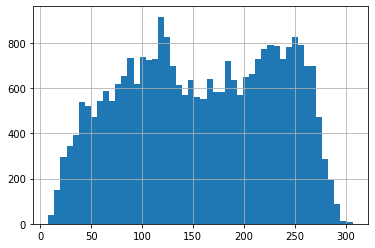

In [19]:
# Length of tweets (characters)

df_tweets_clean['charac_nb'] = df_tweets_clean["text"].apply(len)


print("Mean character nb : ", df_tweets_clean['charac_nb'].mean())
df_tweets_clean["charac_nb"].hist(bins = 50)

In [20]:
# Length of tweets (words)

df_tweets_clean['text_len'] = df_tweets_clean.text.apply(lambda x: len(x.split(' ')) )

In [21]:
df_tweets_clean.head()

,text,charac_nb,text_len
0,"My favorite project is DogeCola, they will soo...",230,31
1,Best time to buy bitcoin right now,34,7
2,"Pi Network is booming platform, Always with my...",167,19
3,It takes time to start trusting a human being....,165,27
4,4/ $KAR | What I'm mostly interested in is the...,265,36


Mean word nb :  23.5240248728095


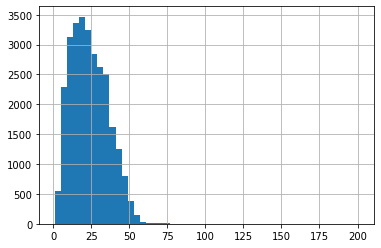

In [22]:
print("Mean word nb : ", df_tweets_clean['text_len'].mean())
df_tweets_clean["text_len"].hist(bins = 50)

In [23]:
# Standard deviation of nb of characters and words per tweet

df_tweets_clean[['charac_nb','text_len']].std()

charac_nb    73.744329
text_len     12.274562
dtype: float64

In [24]:
# Counting the number of distinct words (vocabulary) in our entire dataset

arr = df_tweets_clean.text.drop_duplicates().apply(lambda x: x.split(' ')).array

arr = [ x for X in arr for x in X]

print('%s "words" in the tweets' % (len(set(arr)) ) )


110823 "words" in the tweets


### b. Zipf's law

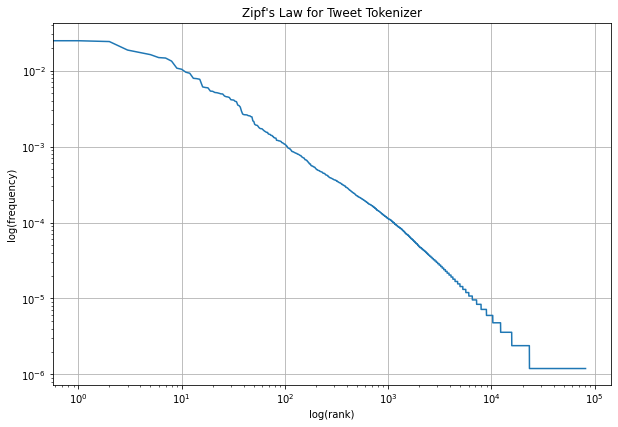

In [25]:
from collections import Counter
import matplotlib.pyplot as plt

tk = TweetTokenizer()

arr = df_tweets_clean.text.drop_duplicates().apply(lambda x: tk.tokenize(x)).array
# We flatten the list. We could use this : arr = reduce(add, arr)   but it would take too much time.
arr = [ x for X in arr for x in X]
# We use reduce to concatenate all the lists in arr, but we don't use "set" 
# so that we can count occurencies with a Counter object 
c = Counter(arr)
# Formating the counter object to a proper dataset
d = pd.DataFrame(c, index=['occurrences']).transpose().reset_index()
d.columns=['word', 'occurences']
# Computing frequencies instead of occurences
nb_total = d.occurences.sum()
d['freq'] = d.occurences.apply(lambda x: x/nb_total)
# Sorting by frequency, most frequent word at the top of the df
d = d.sort_values('freq', ascending=False)
plt.figure(figsize=(10,2/3*10))
plt.grid()
plt.xscale('log')  # Using log scale
plt.yscale('log')  # Using log scale
plt.xlabel('log(rank)')
plt.ylabel('log(frequency)')
plt.title("Zipf's Law for Tweet Tokenizer")
x = list(range(d.shape[0]))
plt.plot(x, d.freq)
plt.show()

The Zipf's Law seems to be verified.

### c. Numbers in tweets

In [26]:
# Regular expression that matches any sequence of numbers:
int_prog = re.compile('[0-9]+')
float_prog = re.compile('[0-9]+\.?[0-9]*')
percent_prog = re.compile('[0-9]+\.?[0-9]*%')
year_prog = re.compile('[12][089][0-9][0-9]') # a year between 1800 and 2099. # 1[89][0-9][0-9]|20[0-9][0-9]
df1 = df_tweets_clean.drop_duplicates('text')  # Don't forget to compute over unique elements if it applies
# Calculating number of matches for every abstract
progs = [int_prog, float_prog, percent_prog, year_prog]
nb_types = ['ints', 'floats', 'percents', 'years']
for prog, nb_type in zip(progs, nb_types):
  df1[nb_type] = df1['text'].apply(lambda x: len(prog.split(x))-1).array
df1[nb_types].head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,ints,floats,percents,years
0,3,3,0,0
1,0,0,0,0
2,12,12,0,0
3,2,2,0,0
4,2,2,0,0


In [27]:
nb_percent_types = [''.join([t, '%']) for t in nb_types]
# Don't forget to compute over unique abstracts
df1 = df_tweets_clean.drop_duplicates('text')

for prog, nb_type in zip(progs, nb_percent_types):
  df1[nb_type] = df1['text'].apply(lambda x: 100 *(1 - len(''.join(prog.split(x)))/len(x))).array
df1[nb_percent_types+['text']].head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,ints%,floats%,percents%,years%,text
0,2.608696,2.608696,0.0,0.0,"My favorite project is DogeCola, they will soo..."
1,0.000000,0.000000,0.0,0.0,Best time to buy bitcoin right now
2,16.766467,16.766467,0.0,0.0,"Pi Network is booming platform, Always with my..."
3,1.818182,1.818182,0.0,0.0,It takes time to start trusting a human being....
4,0.754717,0.754717,0.0,0.0,4/ $KAR | What I'm mostly interested in is the...


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc2da6e9090>,
      dtype=object)

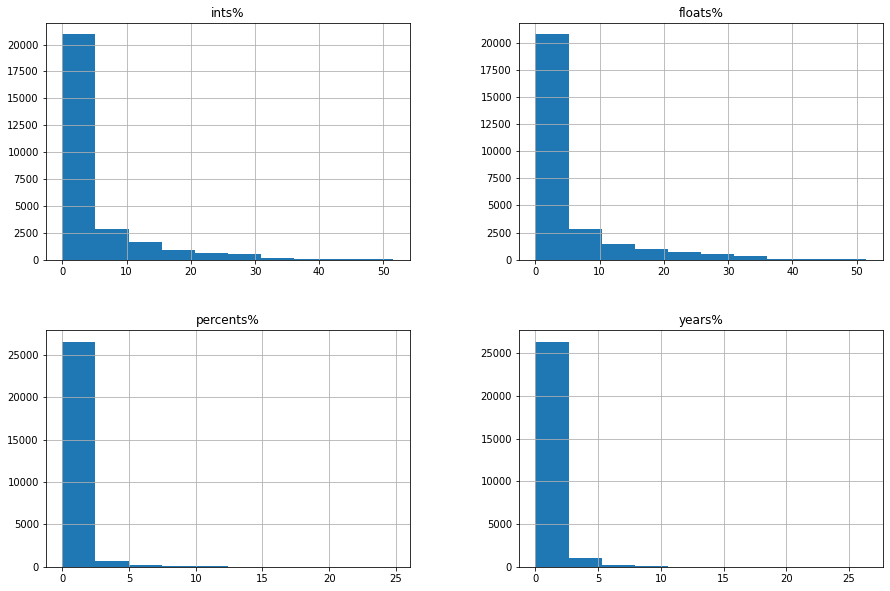

In [28]:
df1[nb_percent_types].hist(figsize=(15,10))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


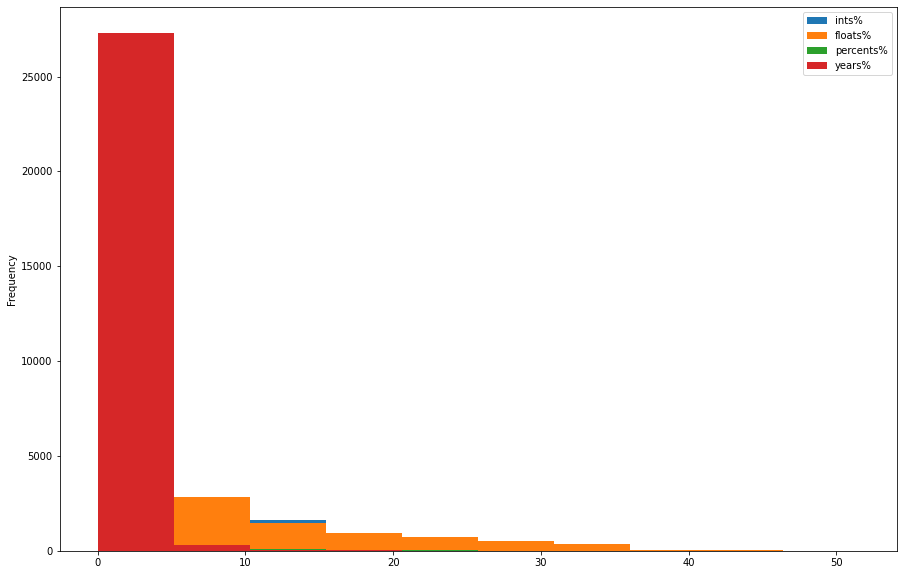

In [29]:
for prog, nb_type in zip(progs, nb_percent_types):
    df1[nb_type] = df1['text'].apply(lambda x: 100 *(1 - len(''.join(prog.split(x)))/len(x))).array
ax = df1[nb_percent_types].plot(figsize=(15,10), kind='hist',subplots=False,sharex=True,sharey=True)

Checking if there is or not a relationship between the percentage of numbers in a tweet and his length.

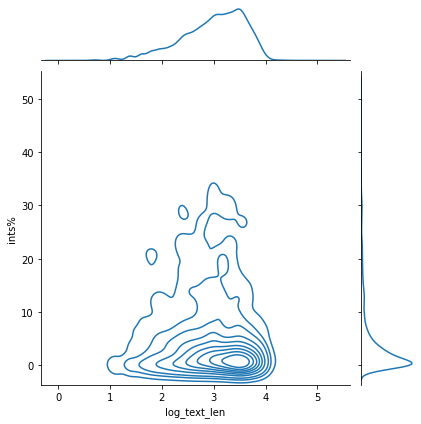

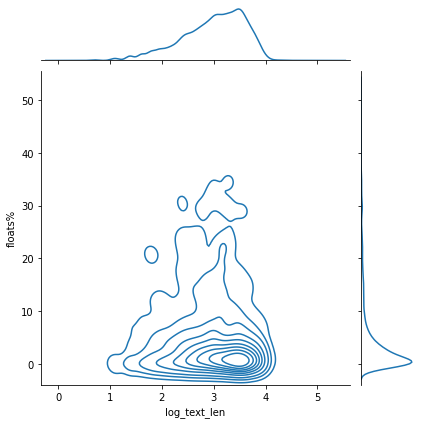

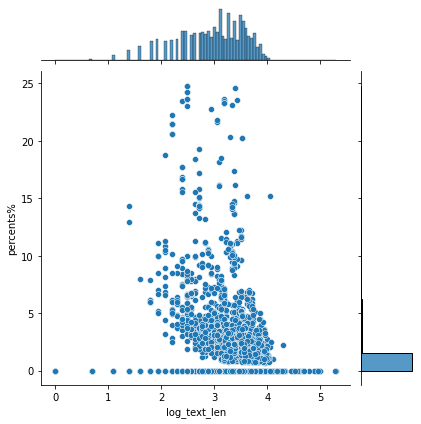

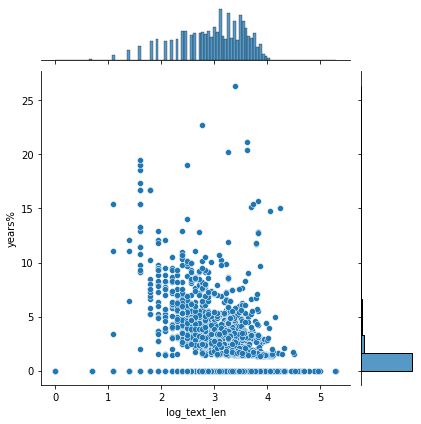

In [30]:
import seaborn as sns
import numpy as np
from scipy.stats import pearsonr, spearmanr
from warnings import filterwarnings
filterwarnings('ignore')

# Plotting the percentages against the corresponding log(citations)
df1['log_text_len'] = np.log(df1['text_len'].array)
for nb_type in nb_percent_types:
  # We will plot percents and years differently, as their scarcity creates a
  # matplotlib overflow when plotting a kde plot
  if nb_type in ['percents%', 'years%']:
    sns.jointplot(data=df1, x='log_text_len', y=nb_type)
    #pass
  else:
    sns.jointplot(data=df1, kind='kde', x='log_text_len', y=nb_type)#annotate(pearsonr)#
    plt.show()

## **4. Sentiment analysis**

### a. Checking if there is or not a relationship between Bitcoin's tweets and his price

In [31]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [32]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [33]:
df_tweets_clean = pd.read_csv(tweets_clean_file)

**Sentiment analysis using VADER**

***VADER***

VADER ( Valence Aware Dictionary for Sentiment Reasoning) is a model used for text sentiment analysis that is sensitive to both polarity (positive/negative) and intensity (strength) of emotion. It is available in the NLTK package and can be applied directly to unlabeled text data.

VADER sentimental analysis relies on a dictionary that maps lexical features to emotion intensities known as sentiment scores. The sentiment score of a text can be obtained by summing up the intensity of each word in the text.

For example- Words like ‘love’, ‘enjoy’, ‘happy’, ‘like’ all convey a positive sentiment. Also VADER is intelligent enough to understand the basic context of these words, such as “did not love” as a negative statement. It also understands the emphasis of capitalization and punctuation, such as “ENJOY”

***Polarity classification***

We will also try to determine if a sentence is objective or subjective.

In [34]:
analyzer = SentimentIntensityAnalyzer()
compound = []

for i,s in enumerate(tqdm(df_tweets_clean['text'],position=0, leave=True)):
    vs = analyzer.polarity_scores(str(s))
    compound.append(vs["compound"])

df_tweets_clean["compound"] = compound
df_tweets_clean.head()

100%|██████████| 28305/28305 [00:10<00:00, 2817.60it/s]


,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,compound
0,Dani VB,NaN,@Dogecola - #DogeCola - #DogeColaNFT / #BNB / ...,2021-08-21 14:11:22,380.0,1130.0,27815.0,False,2022-03-07 12:48:32,"My favorite project is DogeCola, they will soo...","['DogeCola', 'DogeColaNFT', 'NFTs', 'NFT', 'NF...",Twitter Web App,False,0.4588
1,geniusgyani,"Haryana, India",On a mission of #inspiring people,2020-05-15 23:12:18,8.0,164.0,18.0,False,2021-07-19 12:41:24,Best time to buy bitcoin right now,['bitcoin'],Twitter for iPhone,False,0.6369
2,Rayhan,"1342/15 , Chandpur , Banglades",Got a worst mind just...,2015-07-19 06:11:48,39.0,88.0,196.0,False,2022-04-15 14:55:38,"Pi Network is booming platform, Always with my...","['PiNetwork', 'BTC', 'BNB']",Twitter for Android,False,0.4019
3,₿ 🟩,The Citadel,Founder of @shoesinbitcoin & Marketing @btcres...,2018-08-09 19:52:57,401.0,970.0,5205.0,False,2021-08-18 11:16:41,It takes time to start trusting a human being....,['Bitcoin'],Twitter Web App,False,0.8024
4,Nagatø 法,Greece,#Bitcoin | Writing articles & FA ✍️ | Digging ...,2017-12-04 08:24:56,10752.0,2407.0,23707.0,False,2021-07-29 22:46:22,4/ $KAR | What I'm mostly interested in is the...,['BTC'],Twitter Web App,False,0.8591


**Score determination**

We will use this sentiment analysis of the tweets to calculate a score that will represent the importance of each tweet.

To calculate the score for each tweet, we use different variables to which we had a weight based on its importance.

The compound column represents the sentiment of the tweets and its value is between -1 and 1.

We also use the number of retweets, the number of likes, and the number of users that follow the tweet's author.

$score = compound \times N_{followers}\frac{N_{likes}+1}{\left(N_{followers}+1\right)\left(\mathbb{1}_{isRT}+1\right)}$

In [35]:
scores = []

for i, s in tqdm(df_tweets_clean.iterrows(), total=df_tweets_clean.shape[0],position=0, leave=True):

    try:
        scores.append(s["compound"] * ((int(s["user_followers"]))) * ((int(s["user_favourites"])+1)/int(s['user_followers']+1)) *((int(s["is_retweet"])+1)))

    except:
        scores.append(np.nan)

df_tweets_clean["score"] = scores
df_tweets_clean.head()

100%|██████████| 28305/28305 [00:02<00:00, 13221.88it/s]


,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,compound,score
0,Dani VB,NaN,@Dogecola - #DogeCola - #DogeColaNFT / #BNB / ...,2021-08-21 14:11:22,380.0,1130.0,27815.0,False,2022-03-07 12:48:32,"My favorite project is DogeCola, they will soo...","['DogeCola', 'DogeColaNFT', 'NFTs', 'NFT', 'NF...",Twitter Web App,False,0.4588,12728.484787
1,geniusgyani,"Haryana, India",On a mission of #inspiring people,2020-05-15 23:12:18,8.0,164.0,18.0,False,2021-07-19 12:41:24,Best time to buy bitcoin right now,['bitcoin'],Twitter for iPhone,False,0.6369,10.756533
2,Rayhan,"1342/15 , Chandpur , Banglades",Got a worst mind just...,2015-07-19 06:11:48,39.0,88.0,196.0,False,2022-04-15 14:55:38,"Pi Network is booming platform, Always with my...","['PiNetwork', 'BTC', 'BNB']",Twitter for Android,False,0.4019,77.194942
3,₿ 🟩,The Citadel,Founder of @shoesinbitcoin & Marketing @btcres...,2018-08-09 19:52:57,401.0,970.0,5205.0,False,2021-08-18 11:16:41,It takes time to start trusting a human being....,['Bitcoin'],Twitter Web App,False,0.8024,4166.903120
4,Nagatø 法,Greece,#Bitcoin | Writing articles & FA ✍️ | Digging ...,2017-12-04 08:24:56,10752.0,2407.0,23707.0,False,2021-07-29 22:46:22,4/ $KAR | What I'm mostly interested in is the...,['BTC'],Twitter Web App,False,0.8591,20365.648673


### b. Analyse Bitcoin price

In [36]:
df_price.Date = pd.to_datetime(df_price.Date)

df_price.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


**Sentiment analysis impact on Bitcoin price**

In [37]:
df_tweets_clean = df_tweets_clean.drop_duplicates()

In [38]:
# Reorganization in relation to the date of Bitcoin Tweets

tweets = df_tweets_clean.copy()
tweets['date'] = pd.to_datetime(tweets['date'],utc=True)
tweets.date = tweets.date.dt.tz_localize(None)
tweets.index = tweets['date']

In [39]:
# Hourly grouping of Bitcoin Tweets

tweets_grouped = tweets.resample('1h').sum()

In [40]:
tweets_grouped.head()

,user_followers,user_friends,user_favourites,compound,score
date,,,,,
2021-02-05 11:00:00,139.0,29.0,57.0,0.2960,17.045371
2021-02-05 12:00:00,5671.0,779.0,6397.0,-0.4588,-1204.308581
2021-02-05 13:00:00,2906.0,2930.0,57653.0,-0.3447,-19866.497428
2021-02-05 14:00:00,100.0,388.0,3401.0,0.0000,0.000000
2021-02-05 15:00:00,114.0,284.0,648.0,0.0000,0.000000


In [41]:
# Reorganization in relation to the date of Bitcoin price

crypto_usd = df_price.copy()
crypto_usd['Date'] = pd.to_datetime(crypto_usd['Date'], unit='s')
crypto_usd.index = crypto_usd['Date']

In [42]:
# Hourly grouping of Bitcoin Price

crypto_usd_grouped = crypto_usd.resample('D')['Close'].mean()

In [43]:
crypto_usd_grouped.head()

Date
2014-09-17    457.334015
2014-09-18    424.440002
2014-09-19    394.795990
2014-09-20    408.903992
2014-09-21    398.821014
Freq: D, Name: Close, dtype: float64

**Study window**

In [44]:
# Beginning = MAX( MIN( tweets.date ), MIN( price.date ) )
beggining = max(tweets_grouped.index.min().replace(tzinfo=None), crypto_usd_grouped.index.min())

# End = MIN( MAX( tweets.date ), MAX( price.date ) )
end = min(tweets_grouped.index.max().replace(tzinfo=None), crypto_usd_grouped.index.max())

# Resampling our datasets on our window
tweets_grouped = tweets_grouped[beggining:end]
crypto_usd_grouped = crypto_usd_grouped[beggining:end]

**Plotting raw sentiment analysis impact**

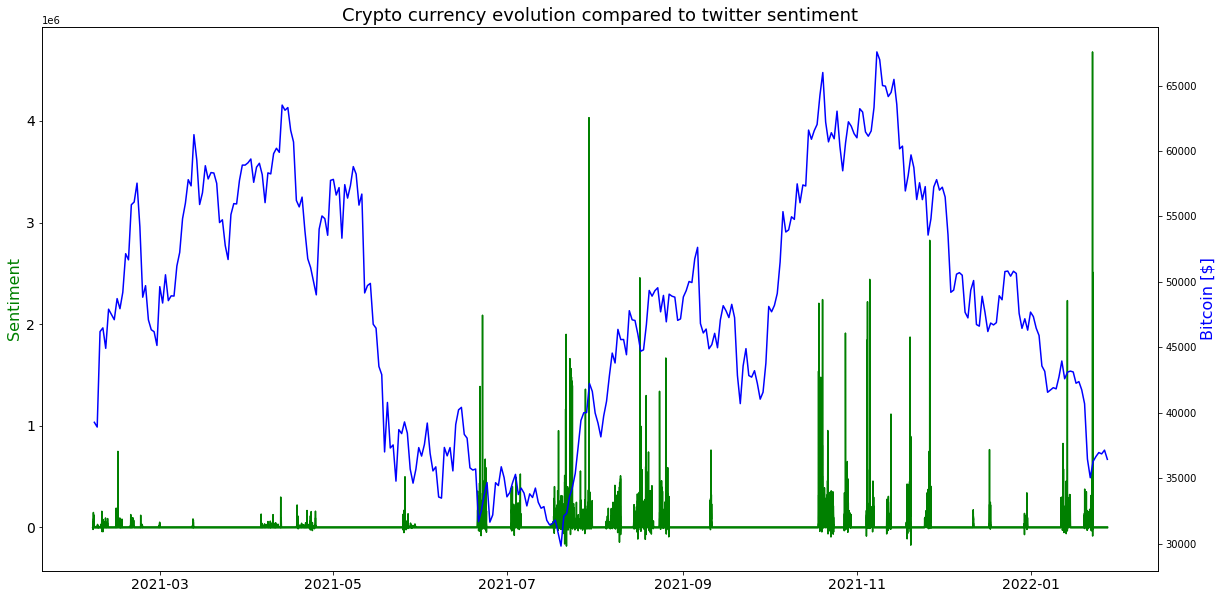

In [45]:
fig, ax1 = plt.subplots(figsize=(20,10))

ax1.set_title("Crypto currency evolution compared to twitter sentiment", fontsize=18)

ax1.tick_params(labelsize=14)
ax2 = ax1.twinx()

ax1.plot_date(tweets_grouped.index, tweets_grouped, 'g-')
ax2.plot_date(crypto_usd_grouped.index, crypto_usd_grouped, 'b-')

ax1.set_ylabel("Sentiment", color='g', fontsize=16)
ax2.set_ylabel("Bitcoin [$]", color='b', fontsize=16)

plt.show()

So we can see that there is a correlation between the price of Bitcoin and the tweets about it.

## **5. NLP modeling for prediction of tweets' sentiment**

### a. Data preprocessing

In [46]:
! pip install textblob

from textblob import TextBlob

TextBlob is a python library and offers a simple API to
access its methods and perform basic NLP tasks, such as sentiment analysis. A good
thing about TextBlob is that they are just like python
strings. Usage of the TextBlob becomes simple.

**Cleaning the tweets**

In [47]:
df = df_tweets_clean.copy()

# We're taking only tweets with hashtags
df.dropna(subset=['hashtags'], inplace=True)

# We only keeping tweets
df = df[['text']] 
df.columns = ['tweets']
df.head()

,tweets
0,"My favorite project is DogeCola, they will soo..."
1,Best time to buy bitcoin right now
2,"Pi Network is booming platform, Always with my..."
3,It takes time to start trusting a human being....
4,4/ $KAR | What I'm mostly interested in is the...


In [48]:

nltk.download('wordnet')
nltk.download('stopwords')

stop_words = nltk.corpus.stopwords.words(['english'])

print(stop_words)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'a

In [49]:
from nltk.stem.wordnet import WordNetLemmatizer

lem = WordNetLemmatizer()

def cleaning(data):
    #Remove URLs
    tweet_without_url = re.sub(r'http\S+',' ', data)

    #Remove hashtags
    tweet_without_hashtag = re.sub(r'#\w+', ' ', tweet_without_url)

    #1. Remove mentions and characters that not in the English alphabets
    tweet_without_mentions = re.sub(r'@\w+',' ', tweet_without_hashtag)
    precleaned_tweet = re.sub('[^A-Za-z]+', ' ', tweet_without_mentions)

    #2. Tokenize
    tweet_tokens = TweetTokenizer().tokenize(precleaned_tweet)

    #3. Remove Puncs and lower all tokens
    tokens_without_punc = [w.lower() for w in tweet_tokens if w.isalpha()]

    #4. Removing Stopwords
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]

    #5. Lemma
    text_cleaned = [lem.lemmatize(t) for t in tokens_without_sw]

    #6. Joining
    return " ".join(text_cleaned)

In [50]:
df['cleaned_tweets'] = df['tweets'].apply(cleaning)
df['date'] = df_tweets_clean['date']
df['date_clean'] = pd.to_datetime(df['date']).dt.strftime('%Y-%m-%d')
df.drop(columns='date',inplace=True)
df.head()

,tweets,cleaned_tweets,date_clean
0,"My favorite project is DogeCola, they will soo...",favorite project dogecola soon release collect...,2022-03-07
1,Best time to buy bitcoin right now,best time buy bitcoin right,2021-07-19
2,"Pi Network is booming platform, Always with my...",pi network booming platform always loveable su...,2022-04-15
3,It takes time to start trusting a human being....,take time start trusting human bitcoin nature ...,2021-08-18
4,4/ $KAR | What I'm mostly interested in is the...,kar mostly interested initial lp incentive pro...,2021-07-29


**Using TextBlob library to get subjectivity and polarity**

In [51]:
def getSubjectivity(tweet):
    return TextBlob(tweet).sentiment.subjectivity

def getPolarity(tweet):
    return TextBlob(tweet).sentiment.polarity

In [52]:
df['subjectivity'] = df['cleaned_tweets'].apply(getSubjectivity)
df['polarity'] = df['cleaned_tweets'].apply(getPolarity)
df.head()

,tweets,cleaned_tweets,date_clean,subjectivity,polarity
0,"My favorite project is DogeCola, they will soo...",favorite project dogecola soon release collect...,2022-03-07,1.000000,0.500000
1,Best time to buy bitcoin right now,best time buy bitcoin right,2021-07-19,0.417857,0.642857
2,"Pi Network is booming platform, Always with my...",pi network booming platform always loveable su...,2022-04-15,0.100000,0.000000
3,It takes time to start trusting a human being....,take time start trusting human bitcoin nature ...,2021-08-18,0.616667,0.136667
4,4/ $KAR | What I'm mostly interested in is the...,kar mostly interested initial lp incentive pro...,2021-07-29,0.470833,0.258333


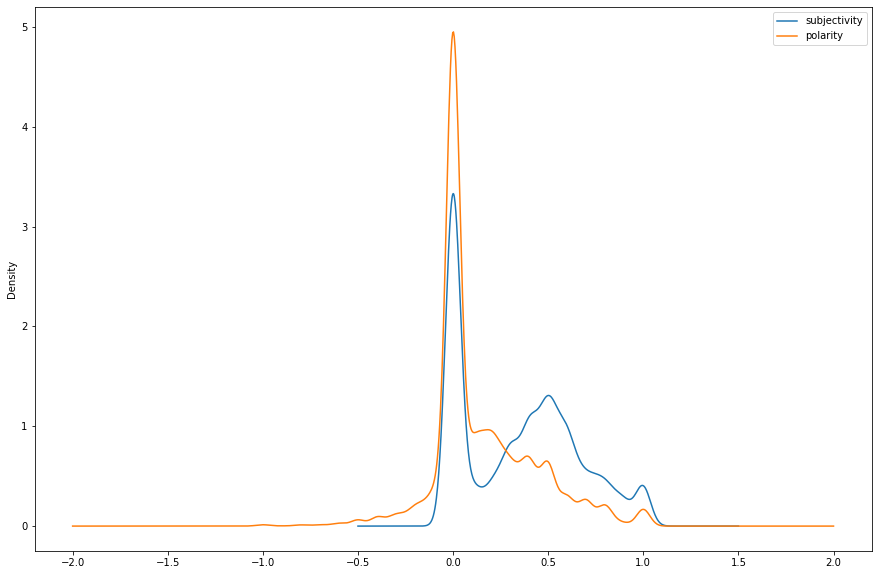

In [53]:
df[['subjectivity', 'polarity']].plot.density(figsize=(15,10))

**Calculate the theoretical sentiment analysis on the price of Bitcoin over time**

In [54]:
def theoricalSentiment(score):
    if score < 1:
        return 'negative'
    elif score == 1:
        return 'neutral'
    else:
        return 'positive'

def observePeriod(period):
    res = crypto_usd_grouped.shift(period)/crypto_usd_grouped
    res = res.apply(theoricalSentiment)
    return res 

time_sentiment = observePeriod(7) # compare price ratio in 7 days. price_7_days_later/ price_now 
df['crypto_sentiment'] = df.date_clean.apply(lambda x: time_sentiment[x] if x in time_sentiment else np.nan)

In [55]:
df.crypto_sentiment.value_counts()

negative    11650
positive    10707
Name: crypto_sentiment, dtype: int64

In [56]:
# Checking correspondence between theorical and TextBlob sentiment Analysis

def getSentiment(score):
    if score < 0:
        return 'negative'
    elif score == 0:
        return 'neutral'
    else:
        return 'positive'

df['sentiment'] = df['polarity'].apply(getSentiment)
df['target'] = df['sentiment'] == df['crypto_sentiment']

df.to_csv('./df_data.csv')

Target will be the fearture representing if a tweet will or not have an impact on Bitcoin price. Indeed, not all the tweets concerning Bitcoin have an impact on it.

### b. Models

In [57]:
import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow.keras.layers as Layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Dropout, Embedding, LSTM, Conv1D, GlobalMaxPooling1D, Bidirectional, SpatialDropout1D, MaxPooling1D
from tensorflow.keras.models import load_model

from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import datasets
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.callbacks import History
from tensorflow.keras import losses

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#### ***1. First naive model***

In [58]:
df = pd.read_csv('./df_data.csv')

In [59]:
df.head()

,Unnamed: 0,tweets,cleaned_tweets,date_clean,subjectivity,polarity,crypto_sentiment,sentiment,target
0,0,"My favorite project is DogeCola, they will soo...",favorite project dogecola soon release collect...,2022-03-07,1.000000,0.500000,NaN,positive,False
1,1,Best time to buy bitcoin right now,best time buy bitcoin right,2021-07-19,0.417857,0.642857,positive,positive,True
2,2,"Pi Network is booming platform, Always with my...",pi network booming platform always loveable su...,2022-04-15,0.100000,0.000000,NaN,neutral,False
3,3,It takes time to start trusting a human being....,take time start trusting human bitcoin nature ...,2021-08-18,0.616667,0.136667,positive,positive,True
4,4,4/ $KAR | What I'm mostly interested in is the...,kar mostly interested initial lp incentive pro...,2021-07-29,0.470833,0.258333,negative,positive,False


In [60]:
X = df['cleaned_tweets']

y = pd.get_dummies(df['sentiment']).values

num_classes = df['sentiment'].nunique()

**Tokenization, padding**

In [61]:
max_words = 5000
max_len=50

def tokenize_pad_sequences(text):
    # 1. Text tokenization
    tokenizer = Tokenizer(num_words=max_words, lower=True, split=' ')
    tokenizer.fit_on_texts(text)
    # 2. Transforms text to a sequence of integers
    X = tokenizer.texts_to_sequences(text)
    # 3. Pad sequences to the same length
    X = pad_sequences(X, padding='post', maxlen=max_len)
    # 4. Return sequences
    return X, tokenizer

print('Before Tokenization & Padding \n', df['cleaned_tweets'][0])
X, tokenizer = tokenize_pad_sequences(df['cleaned_tweets'])
print('After Tokenization & Padding \n', X[0])

Before Tokenization & Padding 
 favorite project dogecola soon release collection nfts eth bridge drink market yecdfnrhus joqvy boi dogecola dogecolanft nfts nft nftcollection eth ethereum btc bnb kvmwnzvemd
After Tokenization & Padding 
 [1171    5  968   83 1050  614   28    4 1155 1426   21  968 2494   28
   13  473    4    9    2   11    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0]


**Train-test split**

In [62]:
seed = 40 # fix random seed for reproducibility

np.random.seed(seed)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.8,
                                                    stratify=y,
                                                    random_state=seed)

print('Train Set: ', X_train.shape, y_train.shape)
print('Test Set: ', X_test.shape, y_test.shape)

Train Set:  (22512, 50) (22512, 3)
Test Set:  (5629, 50) (5629, 3)


In [63]:
X_train[:2]

array([[2332,  520,    4,  858, 1150,   35, 3314,  124,    2,  353,    1,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0],
       [ 338,  251,  256, 3242,  574,  257, 3967, 1867,  489,    1,  112,
        3007,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0]], dtype=int32)

In [64]:
y_train[:2]

array([[1, 0, 0],
       [0, 0, 1]], dtype=uint8)

**Model creation**

In [65]:
batch_size = 128
epochs = 10

max_features = 20000
embed_dim = 100

np.random.seed(seed)
K.clear_session()
model_1 = Sequential()
model_1.add(Embedding(max_features, embed_dim, input_length=X_train.shape[1]))
model_1.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model_1.add(MaxPooling1D(pool_size=2))
model_1.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model_1.add(Dense(num_classes, activation='softmax'))
model_1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 100)           2000000   
                                                                 
 conv1d (Conv1D)             (None, 50, 32)            9632      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 25, 32)           0         
 )                                                               
                                                                 
 lstm (LSTM)                 (None, 100)               53200     
                                                                 
 dense (Dense)               (None, 3)                 303       
                                                                 
Total params: 2,063,135
Trainable params: 2,063,135
Non-trainable params: 0
______________________________________________

**Model fitting**

In [66]:
history = model_1.fit(X_train, y_train, validation_data=(X_test, y_test), 
                          epochs=epochs, batch_size=batch_size, verbose=2)

Epoch 1/10
176/176 - 23s - loss: 0.6711 - accuracy: 0.6975 - val_loss: 0.3566 - val_accuracy: 0.8645 - 23s/epoch - 129ms/step
Epoch 2/10
176/176 - 19s - loss: 0.2874 - accuracy: 0.9005 - val_loss: 0.2440 - val_accuracy: 0.9286 - 19s/epoch - 107ms/step
Epoch 3/10
176/176 - 19s - loss: 0.1607 - accuracy: 0.9540 - val_loss: 0.2165 - val_accuracy: 0.9456 - 19s/epoch - 106ms/step
Epoch 4/10
176/176 - 20s - loss: 0.1053 - accuracy: 0.9720 - val_loss: 0.1922 - val_accuracy: 0.9517 - 20s/epoch - 111ms/step
Epoch 5/10
176/176 - 19s - loss: 0.0747 - accuracy: 0.9797 - val_loss: 0.2009 - val_accuracy: 0.9510 - 19s/epoch - 107ms/step
Epoch 6/10
176/176 - 19s - loss: 0.0597 - accuracy: 0.9850 - val_loss: 0.2154 - val_accuracy: 0.9483 - 19s/epoch - 106ms/step
Epoch 7/10
176/176 - 19s - loss: 0.0526 - accuracy: 0.9875 - val_loss: 0.2224 - val_accuracy: 0.9472 - 19s/epoch - 108ms/step
Epoch 8/10
176/176 - 19s - loss: 0.0420 - accuracy: 0.9894 - val_loss: 0.2416 - val_accuracy: 0.9492 - 19s/epoch - 106

**Model evaluation**

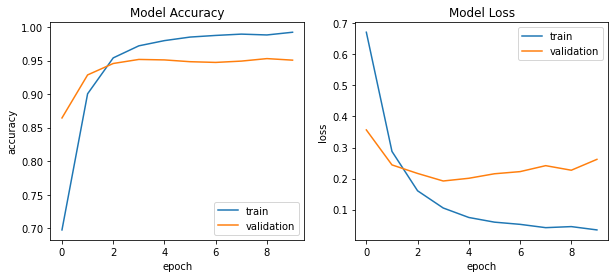

In [67]:
# Function to plot history for accuracy and loss

def plot_training_hist(history):    
    fig, ax = plt.subplots(1,2, figsize=(10,4))
    # Accuracy plot
    ax[0].plot(history.history['accuracy'])
    ax[0].plot(history.history['val_accuracy'])
    ax[0].set_title('Model Accuracy')
    ax[0].set_xlabel('epoch')
    ax[0].set_ylabel('accuracy')
    ax[0].legend(['train', 'validation'], loc='best')
    
    # Loss plot
    ax[1].plot(history.history['loss'])
    ax[1].plot(history.history['val_loss'])
    ax[1].set_title('Model Loss')
    ax[1].set_xlabel('epoch')
    ax[1].set_ylabel('loss')
    ax[1].legend(['train', 'validation'], loc='best')
    
plot_training_hist(history)

In [68]:
# Predict class with test set

y_pred_test =  np.argmax(model_1.predict(X_test), axis=1)
print(f'Accuracy:\t{accuracy_score(np.argmax(y_test,axis=1),y_pred_test)*100:0.1f}%')
print(classification_report(np.argmax(y_test,axis=1), y_pred_test))

Accuracy:	95.1%
              precision    recall  f1-score   support

           0       0.90      0.79      0.84       603
           1       0.95      0.97      0.96      2247
           2       0.96      0.97      0.97      2779

    accuracy                           0.95      5629
   macro avg       0.94      0.91      0.92      5629
weighted avg       0.95      0.95      0.95      5629



2    2779
1    2247
0     603
dtype: int64
2    2785
1    2313
0     531
dtype: int64


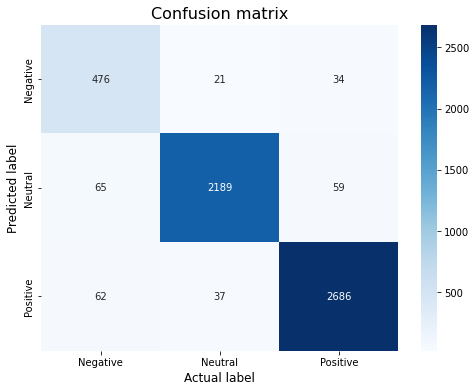

In [69]:
# Function to plot confusion matrix

def plot_confusion_matrix(model, X_test, y_test):
    sentiment_classes = ['Negative','Neutral', 'Positive']
    # use model to do the prediction
    y_pred = model_1.predict(X_test)
    # compute confusion matrix
    cm = confusion_matrix(np.argmax(y_pred, axis=1),np.argmax(np.array(y_test),axis=1))
    
    print(pd.Series(np.argmax(np.array(y_test),axis=1)).value_counts())
    print(pd.Series(np.argmax(y_pred, axis=1)).value_counts())
    
    # plot confusion matrix
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d', 
                xticklabels=sentiment_classes,
                yticklabels=sentiment_classes)
    plt.title('Confusion matrix', fontsize=16)
    plt.xlabel('Actual label', fontsize=12)
    plt.ylabel('Predicted label', fontsize=12)
    
plot_confusion_matrix(model_1, X_test, y_test)

#### ***2. Second model***

**Tokenizatin and padding using the same function computed above**

In [70]:
max_words = 5000
max_len=50

print('Before Tokenization & Padding \n', df['cleaned_tweets'][0])

X, tokenizer = tokenize_pad_sequences(df['cleaned_tweets'])

print('After Tokenization & Padding \n', X[0])

Before Tokenization & Padding 
 favorite project dogecola soon release collection nfts eth bridge drink market yecdfnrhus joqvy boi dogecola dogecolanft nfts nft nftcollection eth ethereum btc bnb kvmwnzvemd
After Tokenization & Padding 
 [1171    5  968   83 1050  614   28    4 1155 1426   21  968 2494   28
   13  473    4    9    2   11    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0]


In [71]:
y = pd.get_dummies(df['sentiment'])

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=10)

# Train validation split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, train_size=0.75, random_state=1)

print('Train Set: ', X_train.shape, y_train.shape)
print('Validation Set: ', X_val.shape, y_val.shape)
print('Test Set: ', X_test.shape, y_test.shape)

Train Set:  (16884, 50) (16884, 3)
Validation Set:  (5628, 50) (5628, 3)
Test Set:  (5629, 50) (5629, 3)


In [72]:
# Function to calculate f1 score

def f1_score(precis, recall): 
    f1_val = 2*(precis*recall)/(precis+recall+K.epsilon())
    return f1_val

In [73]:
vocab_size = 5000
embedding_size = 32
epochs = 50
learning_rate = 0.01
decay_rate = learning_rate / epochs
momentum = 0.8

In [74]:
sgd = SGD(learning_rate=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
# Build model
model_2= Sequential()
model_2.add(Embedding(vocab_size, embedding_size, input_length=max_len))
model_2.add(Conv1D(filters=32, kernel_size=1, padding='same', activation='relu'))
model_2.add(MaxPooling1D(pool_size=2))
model_2.add(Bidirectional(LSTM(32)))
model_2.add(Dropout(0.4))
model_2.add(Dense(3, activation='softmax'))

In [75]:
model_2.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy', Precision(), Recall()])

In [76]:
history = model_2.fit(X_train,y_train,validation_data=(X_val, y_val),batch_size=batch_size,epochs=epochs,verbose=1)

Epoch 1/50
132/132 [==============================] - 10s 47ms/step - loss: 0.9693 - accuracy: 0.4861 - precision: 0.5055 - recall: 0.1545 - val_loss: 0.9484 - val_accuracy: 0.4947 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/50
132/132 [==============================] - 5s 41ms/step - loss: 0.9512 - accuracy: 0.4997 - precision: 0.5330 - recall: 0.1754 - val_loss: 0.9423 - val_accuracy: 0.4947 - val_precision: 0.6340 - val_recall: 0.3330
Epoch 3/50
132/132 [==============================] - 5s 39ms/step - loss: 0.9401 - accuracy: 0.5314 - precision: 0.5939 - recall: 0.2522 - val_loss: 0.9222 - val_accuracy: 0.5652 - val_precision: 0.6373 - val_recall: 0.3443
Epoch 4/50
132/132 [==============================] - 5s 41ms/step - loss: 0.9116 - accuracy: 0.5865 - precision: 0.6339 - recall: 0.4080 - val_loss: 0.8896 - val_accuracy: 0.5929 - val_precision: 0.6475 - val_recall: 0.4687
Epoch 5/50
132/132 [==============================] - 5s 39ms/step - loss: 0.8926 - accurac

In [77]:
# Evaluate model on the test set
loss, accuracy, precision, recall = model_2.evaluate(X_test, y_test, verbose=0)
# Print metrics
print('')
print(f'Accuracy  : {accuracy:.4f}')
print(f'Precision : {precision:.4f}')
print(f'Recall    : {recall:.4f}')
print(f'F1 Score  : {f1_score(precision, recall):.4f}')


Accuracy  : 0.8797
Precision : 0.8893
Recall    : 0.8701
F1 Score  : 0.8796


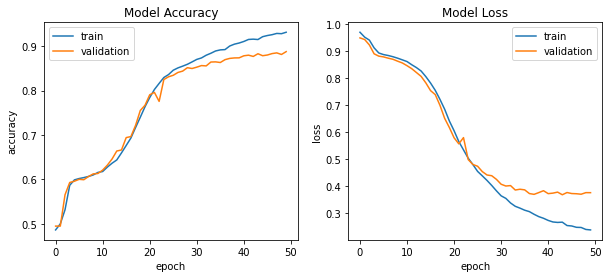

In [78]:
plot_training_hist(history)

2    2780
1    2217
0     632
dtype: int64
2    2775
1    2233
0     621
dtype: int64


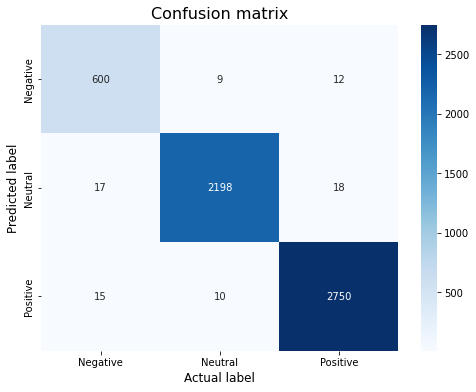

In [79]:
plot_confusion_matrix(model_2, X_test, y_test)

### c. Models schemas comparision

**First model**

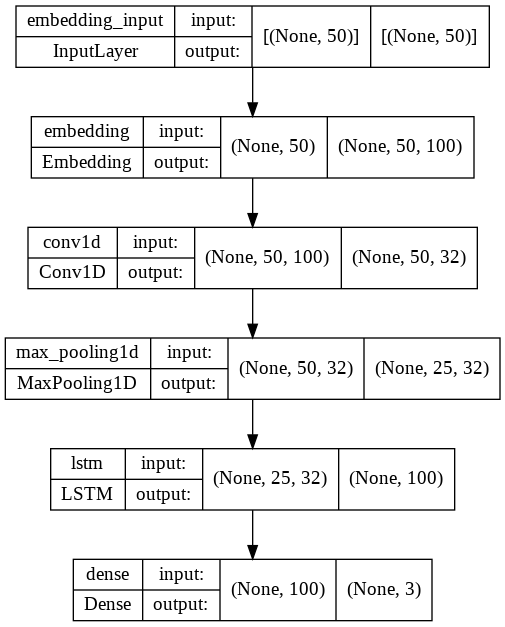

In [80]:
tf.keras.utils.plot_model(model_1, show_shapes=True)

**Second model**

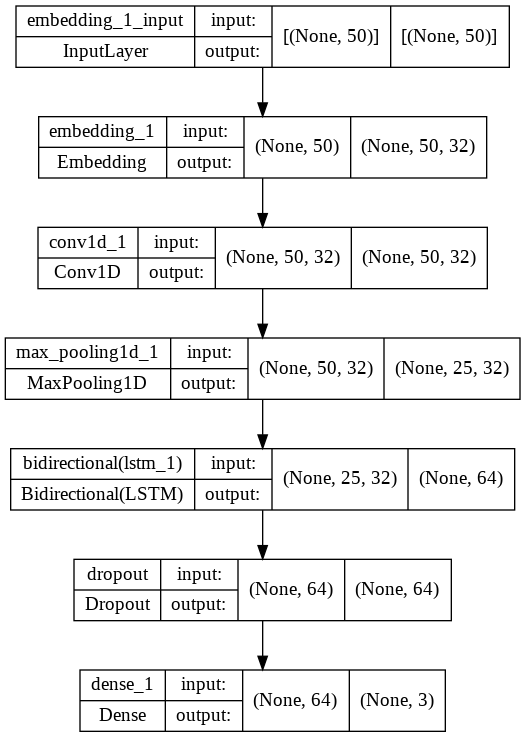

In [81]:
tf.keras.utils.plot_model(model_2, show_shapes=True)